## Introduction

This is a short tutorial for a beginner who want study molecular structure with varoious format.

In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import pandas as pd
from rdkit.Chem import PandasTools

In [14]:
import time
print(time.asctime()) #return by local time

Mon Aug 15 10:31:52 2022


The basics chemical functionality(e.g reading/writing molecules, substructure searching, molecular cleanup, etc) is in the rdkit.Chem module. More adavnced or less rrequently used, functionlity is in rdkit.Chem.AllChem.

In [4]:
mol = "C1=CC=C2C=C3C=C4C=C5C=CC=CC5=CC4=CC3=CC2=C1"
mol = Chem.MolFromSmiles(mol)
print(mol)

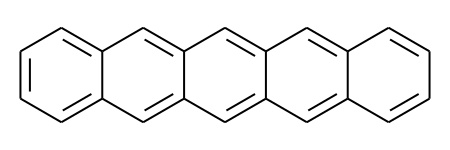

In [5]:
mol

#### Convert a RDKIT molecule to SMILES

In [7]:
smi = Chem.MolToSmiles(mol)
smi

'c1ccc2cc3cc4cc5ccccc5cc4cc3cc2c1'

#### Convert a RDKit molecule to InchiKey

In [8]:
Chem.MolToInchiKey(mol)

'SLIUAWYAILUBJU-UHFFFAOYSA-N'

#### Convert a RDKit molecule to coordinative representation

In [9]:
mol_block = Chem.MolToMolBlock(mol)
print(mol_block)


     RDKit          2D

 22 26  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -8.2500    3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -9.7500    3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  -10.5000    5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -9.7500    6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -8.2500    6.4952    0

#### Reading sets of molecules

Major types of moleculear file formats:
* .csv file that contains a column of SMILES
* .smi/.txt file that includes SMILES as a list

#### Draw molecules in grid

In [11]:
smiles = [

    "CC(O)C",
    "CC(=O)C",
    "CC(CC)C",
    "CC(C)CC(=O)",
    "c1c(N(=O)=O)cccc1",
    "c1c(N(=O)=O)cccc1"
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]

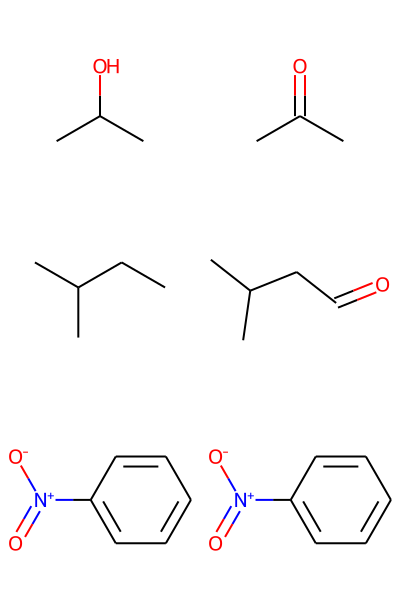

In [12]:
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

#### PandasTools

The PandasTools enables using RDKit molecules as columns of a Pandas DataFrame.

In [22]:
path = os.getcwd()
data = pd.read_csv(path+"/data/delaney.csv", usecols = ["SMILES","measured log(solubility:mol/L)"])
data = data[["SMILES","measured log(solubility:mol/L)"]] # rearrange columns

In [23]:
data.head(1)

,SMILES,measured log(solubility:mol/L)
0,ClCC(Cl)(Cl)Cl,-2.18


#### Add ROMol to Pandas Dataframe

,SMILES,measured log(solubility:mol/L),ROMol
0,ClCC(Cl)(Cl)Cl,-2.18,

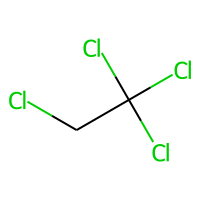

In [24]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol="SMILES")
data.head(1)

In [25]:
print(type(data.ROMol[0]))

<class 'rdkit.Chem.rdchem.Mol'>


ROMol column stores rdchem.Mol object.

#### Draw the molecules in grid with values from another columns

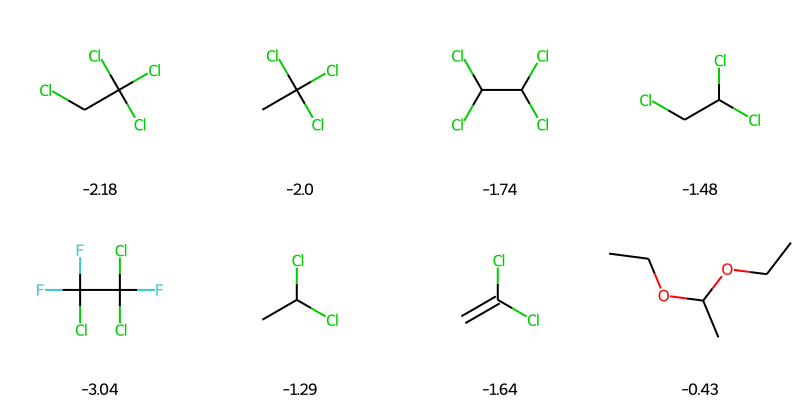

In [27]:
PandasTools.FrameToGridImage(data.head(8), legendsCol="measured log(solubility:mol/L)", molsPerRow=4)

#### Adding new column to dataframe by using map method from pandas.

,SMILES,measured log(solubility:mol/L),ROMol,n_Atoms
0,ClCC(Cl)(Cl)Cl,-2.18,,6

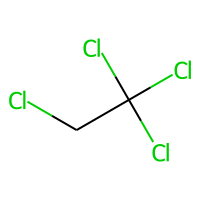

In [28]:
data['n_Atoms'] = data['ROMol'].map(lambda x: x.GetNumAtoms())
data.head(1)

It is suggested to drop "ROMol" column from dataframe for future calculation.

In [29]:
data = data.drop(['ROMol'], axis=1)
data.head(1)

,SMILES,measured log(solubility:mol/L),n_Atoms
0,ClCC(Cl)(Cl)Cl,-2.18,6
